In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


**ABOUT THE DATASET**
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).



In [2]:
train = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train.shape

(150, 5)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Number of individual classes in the target variable SPECIES
train["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


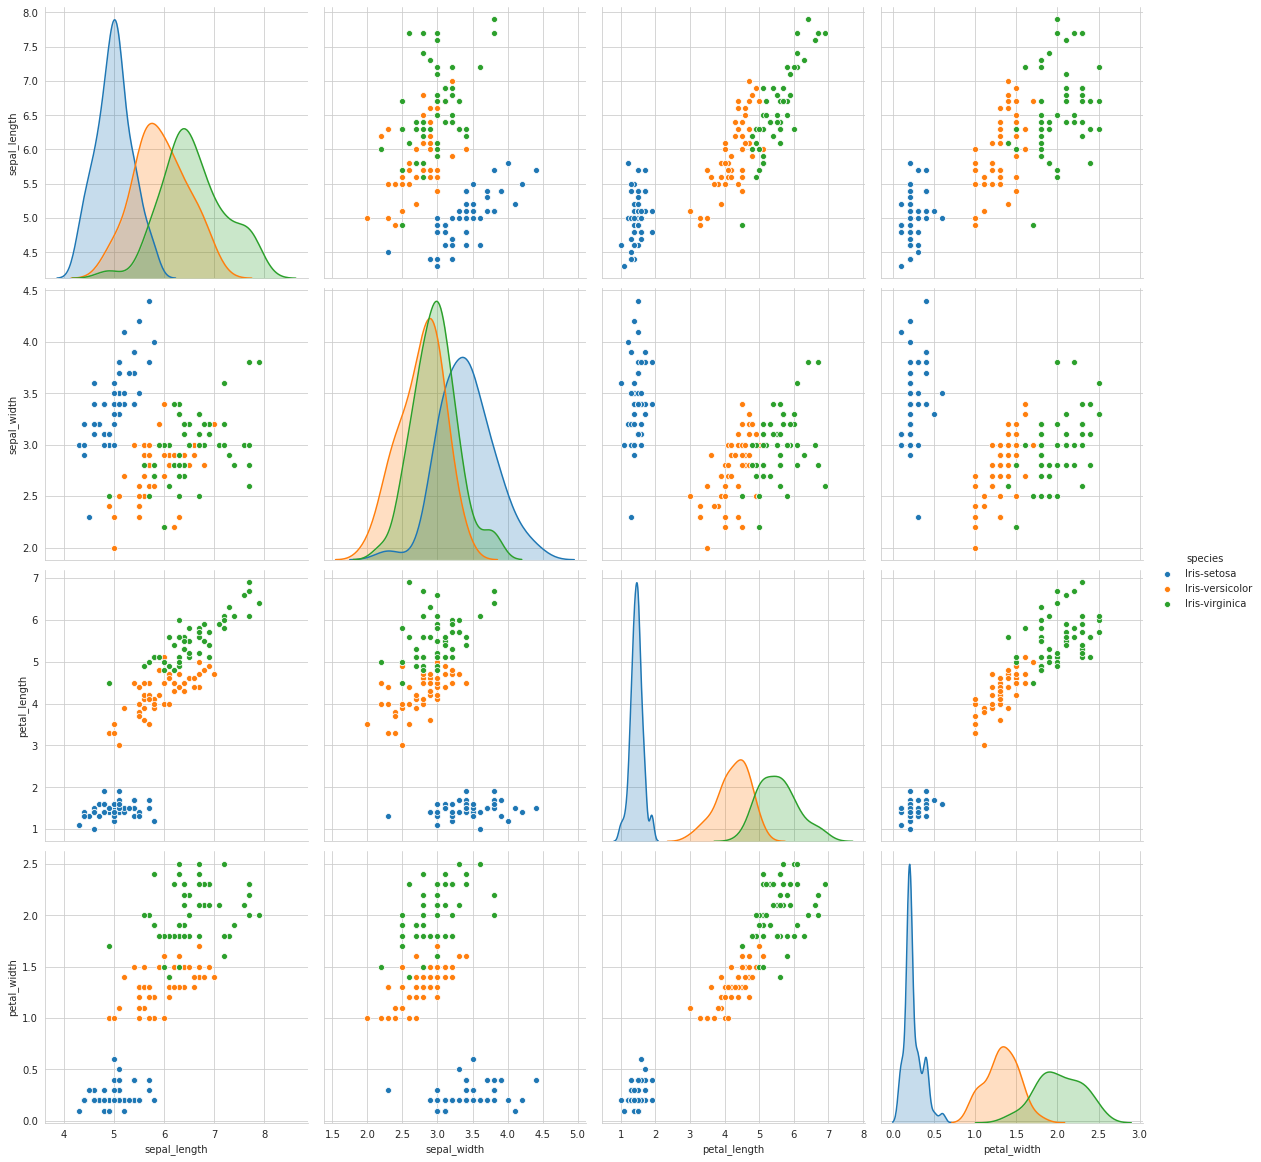

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(train,hue='species',size=4)


**Conclusions from the pairplot Graph on the Dataset**
* In most of the graphs we can distinguish setosa flowers from the other classes.
* Versicolor and Virginica are difficult to distinguish i.e they have similar characteristics.
* Only petal length and petal width have least overlap in the distplots(classes are distinctly identified) therefore they can be used to further distinguish the classes.
* In every pair setosa is linearly separable while versicolor and virginica is overlapping.

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


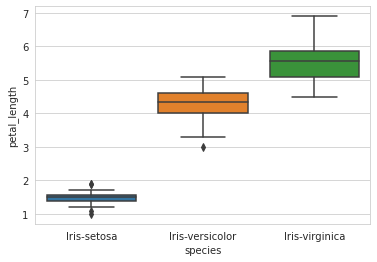

In [11]:

sns.boxplot(x='species',y='petal_length', data=train)
plt.show()

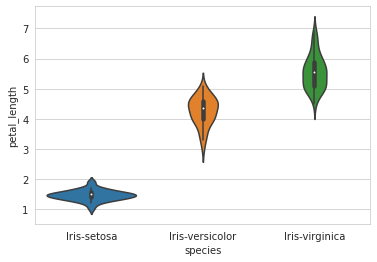

In [13]:

sns.violinplot(x="species", y="petal_length", data=train, size=8)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


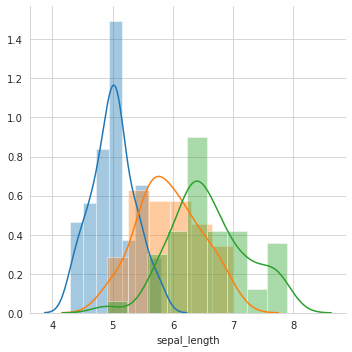

In [15]:
sns.FacetGrid(train,hue='species',size=5).map(sns.distplot,'sepal_length')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


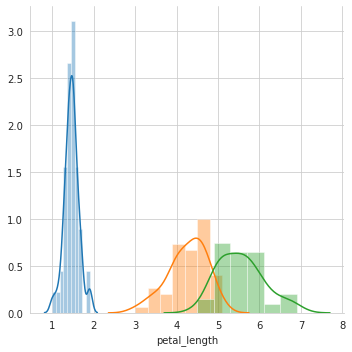

In [17]:
sns.FacetGrid(train,hue='species',size=5).map(sns.distplot,'petal_length')

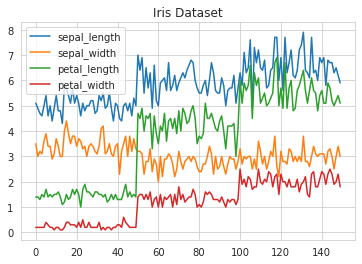

In [19]:
columns = train.columns.drop(['species'])
x_data = range(0, train.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, train[column], label=column)
ax.set_title('Iris Dataset')
ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbe4911990>,
      dtype=object)

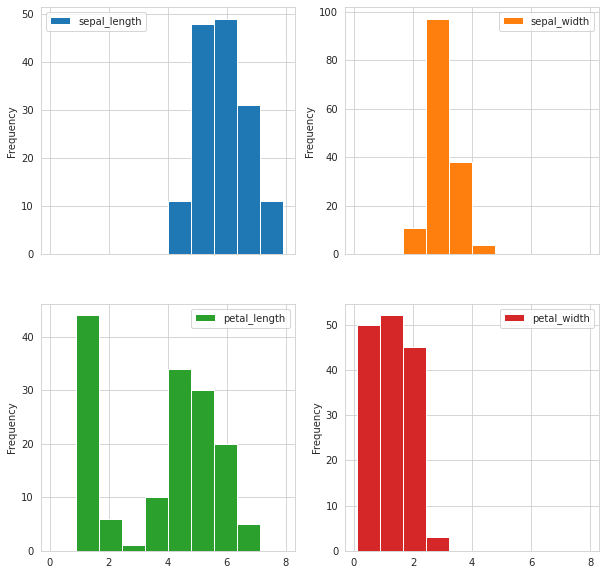

In [21]:
train.plot.hist(subplots = True, layout = (2,2), figsize = (10,10), bins = 10)

* Distribution of petal length and petal width are more skewed than sepal length and sepal width.

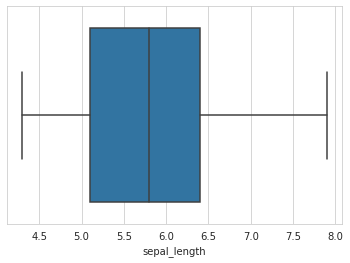

In [39]:
sns.boxplot(train["sepal_length"])

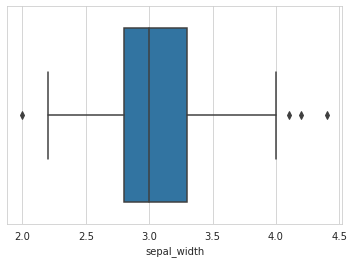

In [40]:
sns.boxplot(train["sepal_width"])

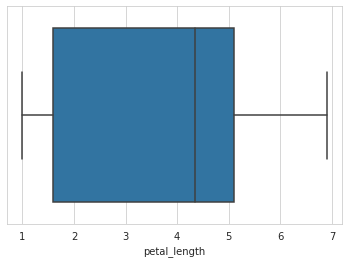

In [41]:
sns.boxplot(train["petal_length"])

In [ ]:
sns.boxplot(train["petal_width"])

In [34]:
def detect_outliers(data):
    data = np.array(data)
    out = []
    data.sort()
    q1, q3= np.percentile(data,[25,75])
    iqr_val = q3-q1
    lower = q1-(1.5*iqr_val)
    upper = q3+(1.5*iqr_val)
    
    for i in data:
        if i > upper or i < lower:
            out.append(i)
    return out,lower,upper

In [35]:
print(detect_outliers(train["sepal_length"]))

([], 3.1499999999999986, 8.350000000000001)


* No outliers in sepal length

In [36]:
print(detect_outliers(train["sepal_width"]))

([2.0, 4.1, 4.2, 4.4], 2.05, 4.05)


* 4 Outliers in sepal width

In [37]:
print(detect_outliers(train["petal_length"]))

([], -3.649999999999999, 10.349999999999998)


* No outliers in petal length

In [38]:
print(detect_outliers(train["petal_width"]))

([], -1.95, 4.05)


* No outliers in petal width